# CSCI-UA 0473 - Introduction to Machine Learning
## Thursday, January 25, 2018

## Logistic Regression 

### Key Points
SETUP: We have a set of data points $\{(x_{1}, y_{1}), (x_{2}, y_{2}), ... , (x_{n}, y_{n})\}$, where $x_{i} \in R^{d}$ are the feature vectors and $y_{i} \in \{0, 1\}$ are the class labels.

MODEL: $p_{+} = p(y = 1|x) = \frac{1}{1 + e^{-w.x + b}}$, where $w, b \in R^{d}$

DISTANCE FUNCTION: -$(y * log(p_{+}) + (1 - y) * log(1 - p_{+}))$

LEARNING RULE: $w \leftarrow w - \eta * (\hat{y} - y) * x$

In [1]:
%matplotlib notebook

import numpy
import matplotlib.pyplot as plot

import matplotlib
matplotlib.rc('text', usetex=True)

In [2]:
numpy.random.seed(1234)

## 1. Data Preparation

In [3]:
from sklearn.datasets import make_blobs

In [4]:
# Sample dataset preparation

n_dim = 2
x_train, y_train = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)
x_test, y_test = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)

## 2. Model Definition

In [5]:
'''
Sigmoid function.

INPUT: A scalar/vector
OUTPUT: A value between (0, 1) for each input component
'''

def sigmoid(a):
    return 1. / (1. + numpy.exp(-a))

In [6]:
'''
Definition of the logistic regression model.

INPUT: Feature vector (x) and weight vector (w)
OUTPUT: The probability of each data point belonging to the positive class.
'''

def logreg(x, w, pre=False):
    x = x.reshape([1, -1]) if len(x.shape) < 2 else x
    
    y = numpy.sum(x * w[None,:-1], axis=1) + w[-1]
    if pre:
        return y    
    return sigmoid(y)

In [7]:
'''
Distance function of the logistic regression model (popularly called likelihood). 

INPUT: True labels (y), feature vector (x) and weight vector (w)
OUTPUT: Log of the likelihood for the given 'w'
'''

def logreg_dist(y, x, w, avg=False):
    y_ = logreg(x, w)
    
    d = -(y * numpy.log(y_) + (1. - y) * numpy.log(1-y_))
    
    if not avg:
        return d
    return numpy.mean(d)

In [8]:
'''
Learning rule for the logistic regression model.

INPUT: True labels (y), feature vector (x) and weight vector (w)
OUTPUT: The direction of update for the weight vector
'''

def logreg_rule(y, x, w):
    y_ = logreg(x, w)
    dw = numpy.zeros(w.shape)
    dw[:-1] = numpy.mean((y_ - y)[:, None] * x, axis=0)
    dw[-1] = numpy.mean(y_ - y)
    return dw

## 3. Learning Process

In [9]:
# Initializing the weight vector randomly
w0 = numpy.random.randn(n_dim+1); w0[-1] = 0.
w = numpy.copy(w0)

n_iter = 1000
eta = .1   # Learning rate
old_cost = numpy.Inf

for ni in range(n_iter):
    pred_y = logreg(x_train, w)
    
    w -= eta * logreg_rule(y_train, x_train, w)    # Updating the weight vector
    
    cost = logreg_dist(y_train, x_train, w, avg=True)
    
    if numpy.mod(ni, 50) == 0:
        print('Logistic regression cost {:.4f} after iteration {}'.format(cost, ni))
    if cost < 1e-16 or cost / old_cost >= 1.:
        print('Converged')
        break
    old_cost = cost

Logistic regression cost 1.7992 after iteration 0
Logistic regression cost 0.2140 after iteration 50
Logistic regression cost 0.1548 after iteration 100
Logistic regression cost 0.1329 after iteration 150
Logistic regression cost 0.1210 after iteration 200
Logistic regression cost 0.1133 after iteration 250
Logistic regression cost 0.1078 after iteration 300
Logistic regression cost 0.1038 after iteration 350
Logistic regression cost 0.1007 after iteration 400
Logistic regression cost 0.0982 after iteration 450
Logistic regression cost 0.0962 after iteration 500
Logistic regression cost 0.0945 after iteration 550
Logistic regression cost 0.0931 after iteration 600
Logistic regression cost 0.0918 after iteration 650
Logistic regression cost 0.0908 after iteration 700
Logistic regression cost 0.0899 after iteration 750
Logistic regression cost 0.0891 after iteration 800
Logistic regression cost 0.0884 after iteration 850
Logistic regression cost 0.0877 after iteration 900
Logistic regres

In [10]:
print('Initial: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w0)))
print('Final: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w)))

Initial: 0.901 x_1 + 0.753 x_2 + 0.000 = 0
Final: -3.417 x_1 + -1.738 x_2 + 0.358 = 0


## 4. Visualize Final Model

In [11]:
# visualize data 
def vis_data(x, y = None, c='r', open_figure=False):
    if open_figure:
        plot.figure()
    if y is None: 
        y = [None] * len(x)
    for x_, y_ in zip(x, y):
        if y_ is None:
            plot.plot(x_[0], x_[1], 'o', markerfacecolor='none', markeredgecolor=c)
        else:
            plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.grid('on')

In [12]:
def vis_hyperplane(w, typ='k--'):

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]

    intercept0 = -(w[0] * m0 + w[-1])/w[1]
    intercept1 = -(w[0] * m1 + w[-1])/w[1]
    
    plt1, = plot.plot([m0, m1], [intercept0, intercept1], typ)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    
    return plt1

In [13]:
def vis_decision_boundary_contour(w, typ='k--'):
    
    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    
    x_ = numpy.linspace(lim0[0], lim0[1], 100)
    y_ = numpy.linspace(lim1[0], lim1[1], 100)
    xx, yy = numpy.meshgrid(x_, y_)
    
    x_tra_ = numpy.concatenate([xx.ravel()[:,None], yy.ravel()[:,None]], axis=1)
    
    pred = logreg(x_tra_, w)
    plt1 = plot.contourf(xx, yy, pred.reshape(xx.shape), cmap=plot.cm.coolwarm, alpha=0.4)
    
    plot.colorbar(plt1)
    
    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    
    return plt1

<IPython.core.display.Javascript object>


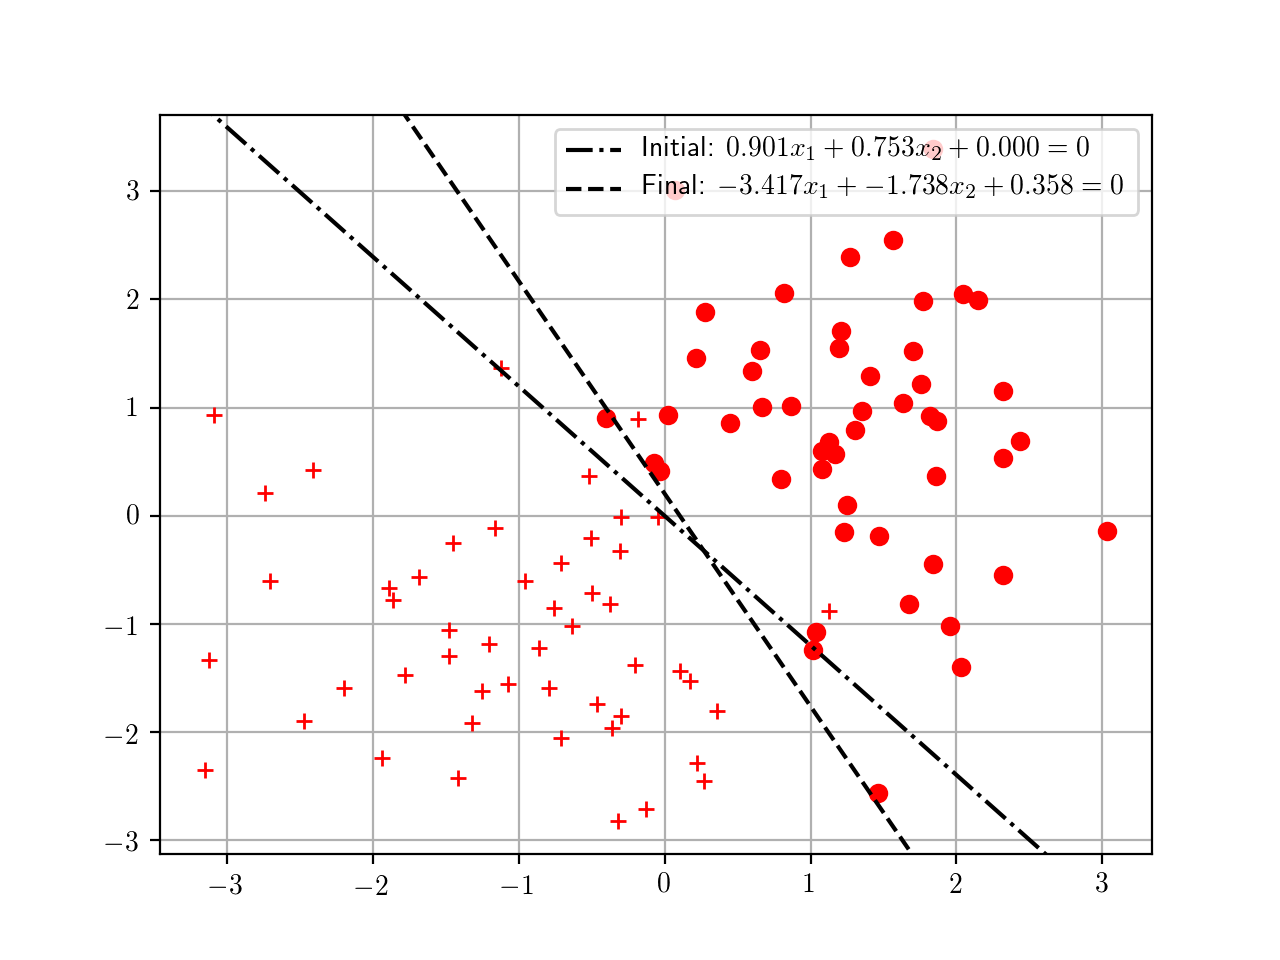

In [14]:
plot.figure()

vis_data(x_train, y_train, c='r')

plt0 = vis_hyperplane(w0, 'k-.')
plt1 = vis_hyperplane(w, 'k--')
plot.legend([plt0, plt1], [
        'Initial: ${:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0$'.format(*list(w0)),
        'Final: ${:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0$'.format(*list(w))],
           loc='best')

plot.show()

<IPython.core.display.Javascript object>


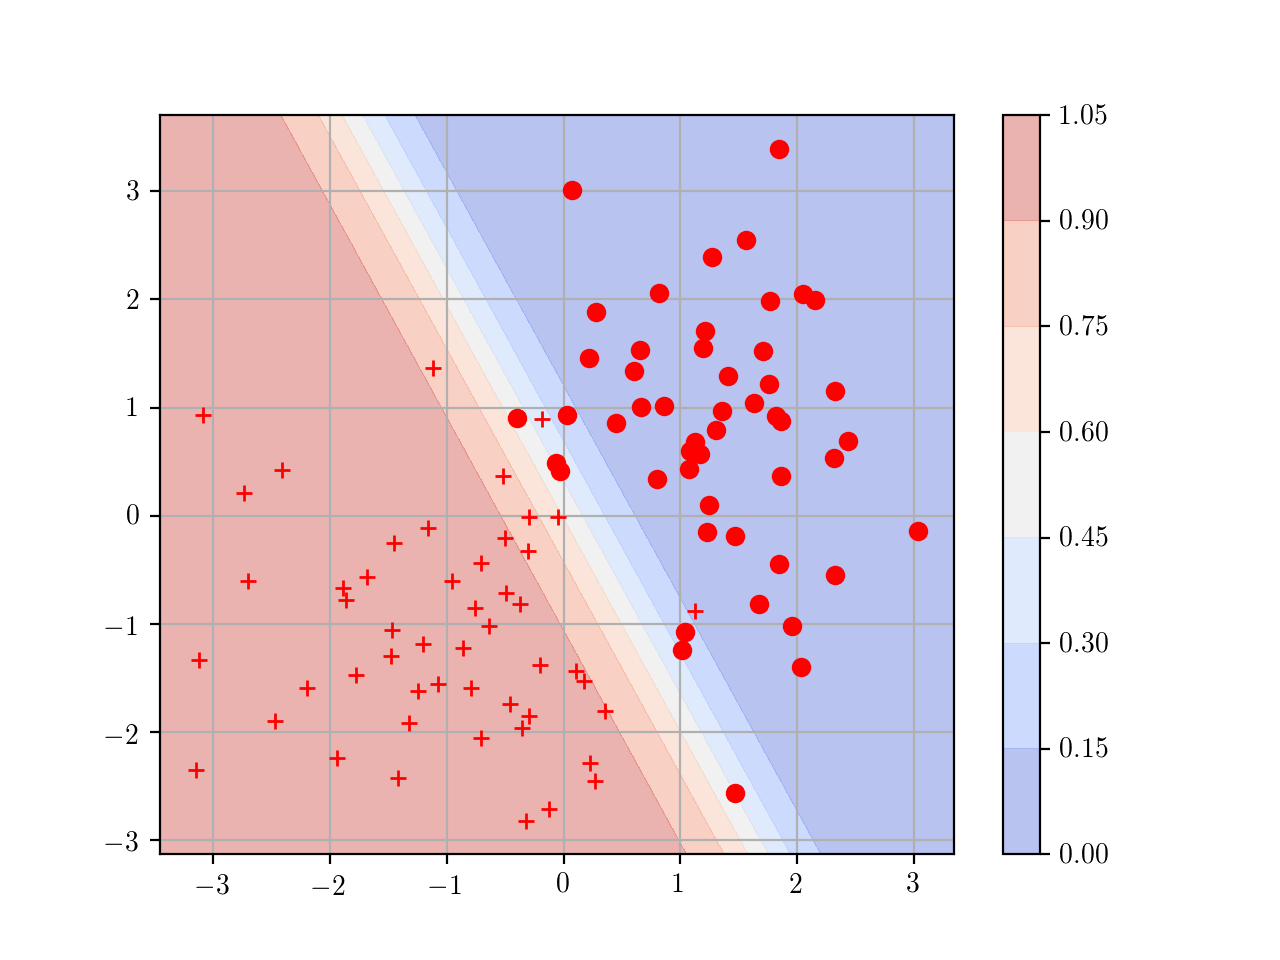

In [15]:
vis_data(x_train, y_train, c= 'r', open_figure=True)
vis_decision_boundary_contour(w)

## 5. Testing

<IPython.core.display.Javascript object>


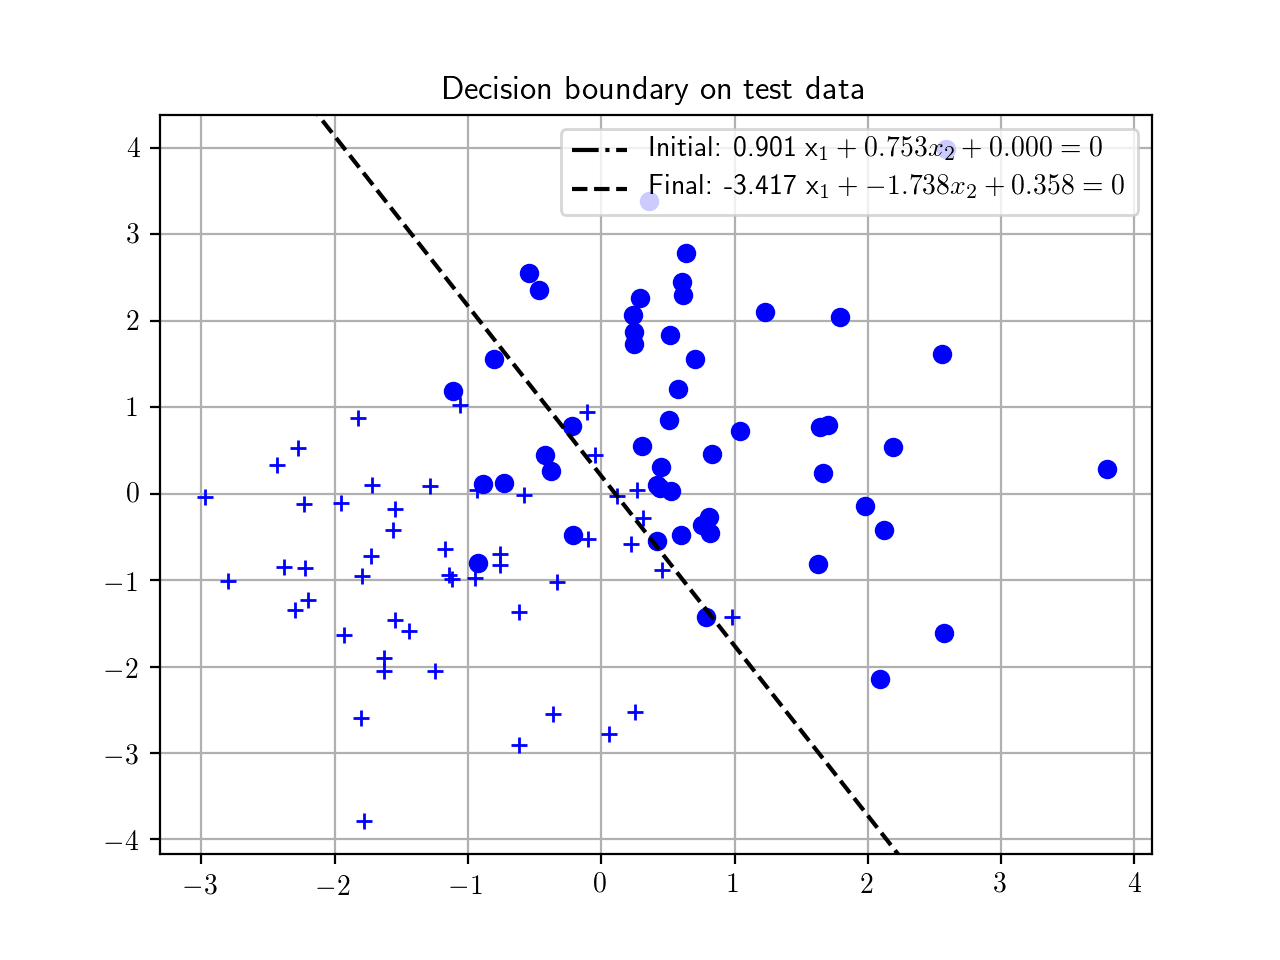

In [16]:
# Decision boundary on test data

plot.figure()

vis_data(x_test, y_test, 'b')

plt1 = vis_hyperplane(w, 'k--')

plot.legend([plt0, plt1], [
        'Initial: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w0)),
        'Final: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w))],
           loc='upper right')

plot.legend(fontsize = 20, loc = 'best')
plot.title('Decision boundary on test data')
plot.show()

In [17]:
train_error = numpy.sum(numpy.abs(numpy.round(logreg(x_train, w)) - y_train)) / numpy.float(len(y_train))
test_error = numpy.sum(numpy.abs(numpy.round(logreg(x_test, w)) - y_test)) / numpy.float(len(y_test))

print('Training error rate {}, Test error rate {}'.format(train_error, test_error))

Training error rate 0.03, Test error rate 0.14


## 6. HOMEWORK - Use scikit-learn to replicate the above operations

In [18]:
# Use this cell to import required packages of sklearn


In [19]:
# STEP 1: Create a Logistic Regression class instance


In [20]:
# STEP 2: Fit the logistic regression model to the training data


In [21]:
# STEP 3: Obtain the coefficients of the learned model (read the documentation to find out how)
# Uncomment and complete the following

# sk_w = 

In [22]:
# STEP 4: Compare the feature coefficients obtained by sklearn and the custom module we have

# Note: Print the equations of the model learned by both implementations and comment about what you observe.
# Uncomment and complete the following

# print('Custom : {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*list(w)))
# print('Sklearn: {:.3f} x_1 + {:.3f} x_2 + {:.3f} = 0'.format(*sk_w))

In [23]:
# STEP 5: Predict the class of test data points. Print the TRAINING and TEST accuracy.
# Uncomment and complete the following

# print('Training error rate {}, Test error rate {}'.format(train_error, test_error))